In [1]:
from statsbombpy import sb
import pandas as pd
import seaborn as sn
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt


In [2]:
comp=sb.competitions()
print (comp[comp.season_id==1])

credentials were not supplied. open data access only
    competition_id  season_id country_name  competition_name  \
1               16          1       Europe  Champions League   
20              11          1        Spain           La Liga   

   competition_gender season_name               match_updated  \
1                male   2017/2018  2021-01-23T21:55:30.425330   
20               male   2017/2018  2021-04-19T17:36:05.805404   

               match_available  
1   2021-01-23T21:55:30.425330  
20  2021-04-19T17:36:05.805404  


In [3]:
comp_id = 11 #11 la liga 16 ucl

In [4]:
matches= sb.matches(competition_id=11,season_id=1)
match_l= []
team_name = "Barcelona"
match_ids= list(matches[matches.home_team==team_name].match_id) + list(matches[matches.away_team==team_name].match_id)
#print(matches.match_status)

credentials were not supplied. open data access only


In [5]:
ball_rec_locs=[]

for i in match_ids:
    events=sb.events(match_id=i)
    #print player names
    
    #print(events[events['player'].notnull()].player.drop_duplicates())
    player_name="Lionel Andrés Messi Cuccittini"
    player_events=events[events.player==player_name]
    if player_events.empty:
        continue
    ball_rec_locs.append(player_events[player_events.type=="Ball Receipt*"].location)
    
   


credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data access only
credentials were not supplied. open data acces

In [6]:
#print(ball_rec_locs)

#print(pd.concat(ball_rec_locs).reset_index())

ball_recp_df=pd.concat(ball_rec_locs).reset_index()
 

ball_recp_df=pd.DataFrame(list(ball_recp_df.location),columns=["X","Y"])
print(ball_recp_df)

          X     Y
0      95.0  57.0
1      99.0  67.0
2      58.0  20.0
3      69.0  70.0
4      87.0  71.0
...     ...   ...
2440  101.0  52.0
2441   98.0  53.0
2442  111.0  41.0
2443  102.0  37.0
2444  110.0  49.0

[2445 rows x 2 columns]


/home/armaan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


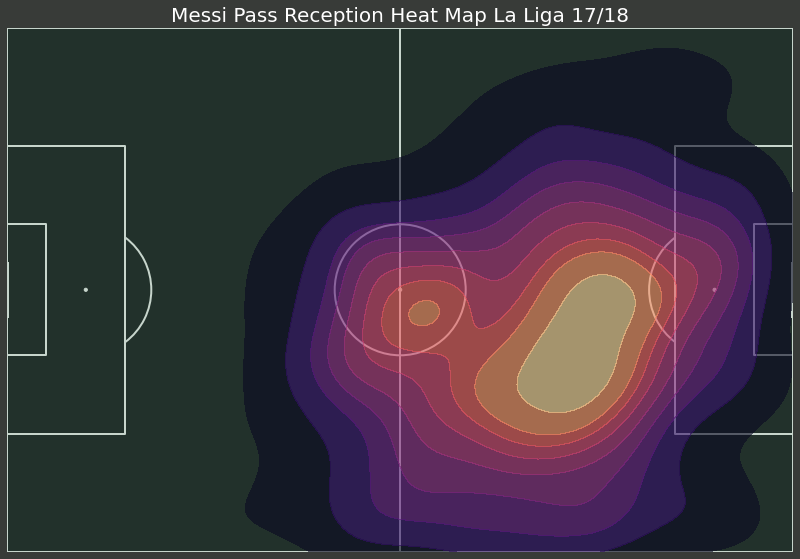

In [13]:

pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(11, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#383b38")


kde=sn.kdeplot(
    ball_recp_df["X"],
    ball_recp_df["Y"],
    shade=True,
    shade_lowest=False,
    alpha=0.6,
    cmap='magma',
    levels=10
    
)

plt.xlim(0,120)
plt.ylim(0,80)
plt.title("Messi Pass Reception Heat Map La Liga 17/18",size=20,fontdict={'color':'white'})
plt.gca().invert_yaxis()
plt.savefig("messi_plot.jpg")
plt.show()
